In [5]:
import sys
!{sys.executable} -m pip install python-dotenv


In [6]:
!{sys.executable} -m pip install entsoe-py

  Using cached entsoe_py-0.4.1-py3-none-any.whl (25 kB)


In [7]:
from dotenv import dotenv_values
from entsoe import EntsoePandasClient

import pandas as pd

In [8]:
config = dotenv_values("../.env")

In [15]:
client = EntsoePandasClient(api_key=config["entsoe_key"])

start = pd.Timestamp("20210901", tz="UTC")
end = pd.Timestamp("20211220", tz="UTC")
country_code = "AT"

sample_data = client.query_load(country_code, start=start, end=end)

In [16]:
sample_data

,Actual Load
2021-09-01 02:00:00+02:00,5426.0
2021-09-01 02:15:00+02:00,5403.0
2021-09-01 02:30:00+02:00,5352.0
2021-09-01 02:45:00+02:00,5365.0
2021-09-01 03:00:00+02:00,5346.0
...,...
2021-12-19 23:45:00+01:00,6507.0
2021-12-20 00:00:00+01:00,6649.0
2021-12-20 00:15:00+01:00,6564.0
2021-12-20 00:30:00+01:00,6478.0


<AxesSubplot:>

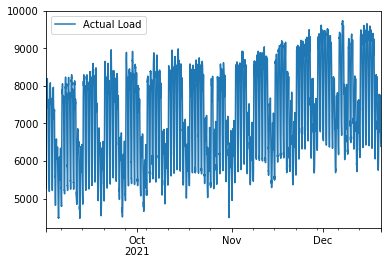

In [17]:
sample_data.plot()